<a href="https://colab.research.google.com/github/m07dubs/CompPhys/blob/main/Mitchell_Dubson_Lab07_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 07: Numerical Integration

* There are many techniques for implementing numerical integration.  In this lab, you will write code to implement the trapezoid method of integration.

* You will use this function to calculate the integral in several different physical situations.

* You will compare your function with python's built-it numerical integrators.

In [ ]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt
import math

# Part 1: Write a Function to Implement the Trapezoid Integration Method

(5 points)

Write a function called **trap** that does the following.

Input:
* array of y values
* array of x values, spanning from from xmin to xmax


Function should integrate using the trapezoid method.

Return:
* the integral of $f(x)$ between xmin and xmax

In [ ]:
# write your function here
def trap(y,x):
  Area = 0
  for i in range(len(x) - 1):
    Area += (0.5)*(y[i]+y[i+1])*(x[i+1] - x[i])


  return Area




# Part 2:  Calculate the Area Under the Half Circle

(10 points)

In the pre-lab assignment, we estimated the area of a half circle using the trapezoid method.

The general equation for a circle is:

$$ r^2 = x^2 + y^2 $$

For a circle of $r=2$, we can solve for the y coordinate:

$$ f(x) = y = \sqrt{2^2 - x^2} $$.


### Write a function to return the y values of your circle

* In the first cell below, write a function called **mycircle** that returns the y value of the circle.

* let the radius be an optional argument, and set the default value to $r=2$.






In [ ]:
# write your function mycircle here
def mycircle(x,r=2):
  y = np.sqrt(r**2 - x**2)

  return y




### Calculate the area under the half circle using integration

* In the next cell, set up an array of x values with $-2 \le x \le 2$, with 100 divisions between $-2$ and $2$.  
* Calculate the corresponding y values using your **mycircle** function.

* Then use your **trap** function to calculate the area under the circle.

* Print the value of your area using a formatted print statement.  Print five decimal places.

In [ ]:
x = np.linspace(-2,2,100)

y = mycircle(x,r=2)

Area_Circle = trap(y,x)

print(f"The area under this circle is {Area_Circle:.6}")

The area under this circle is 6.27644


### Determine the Accuracy of Your Integral

* Compare your answer with the accepted value of the integral.

* Calculate and print your percent error.

In [ ]:
r = 2
per_error = (np.abs((.5*np.pi*r**2) - (6.27644))/(0.5*np.pi*r**2)) * 100

print(f"The error percentage is {per_error}")

The error percentage is 0.10735489803043968


### The impact of the spacing in the x array

* Repeat your above calculations, but divide the region $-2 \le x \le 2$ into 1000 steps.

* You can copy all of the necessary code into one cell to simplify your calculation.

* **SUMMARY**: describe how the accuracy of your integral changes as the size of the steps in the x direction decreases?

**YOUR ANSWER HERE**



In [ ]:
x = np.linspace(-2,2,1000)

y= mycircle(x,r=2)

Area_Circle_Adjusted = trap(y,x)

print(f"The area under this circle is {Area_Circle_Adjusted:.6}")

per_error = (np.abs((.5*np.pi*r**2) - (6.28297))/(0.5*np.pi*r**2)) * 100

print(f"The error percentage is {per_error}")

The area under this circle is 6.28297
The error percentage is 0.0034267201914367526


# Part 3: Integral of the Gaussian Distribution

(10 points)

The gaussian function (aka normal distribution) is:
$$  f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left(\frac{x-\bar{x}}{\sigma}\right)^2} $$

where:
* $\bar{x}$ is the average of a distribution
* $\sigma$ is the standard deviation of the distribution


Write a function **mygauss** that does the following:

* Input
  * x
  * mean
  * sigma

* calculate $f(x)$

* Return
  * $f(x)$




In [ ]:
def mygauss(x,mean=0, sigma=1):

  fx = ((np.sqrt(2*np.pi*sigma)**-1)) * np.exp((-0.5) * ((x - mean)/sigma)**2)

  return fx

### Integrate your gaussian

* write code to integrate the gaussian between:
* $ -\sigma \le x \le \sigma $

* Compare your results with the expected answer, and calculate your percent error.

* If you are not sure what the expected answer is, [look here](https://en.wikipedia.org/wiki/Normal_distribution)

In [ ]:
sigma = 1
x = np.linspace(-sigma,sigma)

fx = mygauss(x,mean = 0,sigma =1)

integrate = trap(fx, x)

print(f"The value of this integration is {integrate}")

The value of this integration is 0.6826223023096981


Calculate the integral for:
* $ -2\sigma \le x \le 2\sigma $

and compare with the accepted answer.

In [ ]:
sigma = 1
x = np.linspace(-2*sigma, 2*sigma)

fxnew = mygauss(x,mean = 0,sigma =1)

integrate_new = trap(fxnew, x)

print(f"The value of this integration is {integrate_new}")

The value of this integration is 0.9543798194879076


Calculate the integral for:
* $ -3\sigma \le x \le 3\sigma $

and compare with the accepted answer.

In [ ]:
sigma = 1
x = np.linspace(-3*sigma, 3*sigma)

fxnewnew = mygauss(x,mean = 0,sigma =1)

integrate_new_new = trap(fxnewnew, x)

print(f"The value of this integration is {integrate_new_new}")

The value of this integration is 0.997267028716249


# Part 4: Using Python Built-In Functions
(5 points)

* Let's revisit parts 1 and 4 and use python's built-in functions to complete the integration.

* You can use the ```scipy.integrate.trapezoid``` function to perform your integration.

In [ ]:
#import scipy.integrate.trapezoid
from scipy.integrate import trapezoid

# set up x and y arrays for the half circle
x = np.linspace(-2,2)
y = mycircle(x,r=2)
# call scipy.integrate.trapezoid to perform the integration
integration = np.abs(trapezoid(x,y))
# print your result and the expected answer in a formatted print statement
print(f"The integral function returns: {integration}, the expected value of this is: {Area_Circle}")

The integral function returns: 6.263814893872048, the expected value of this is: 6.276436078403621


In [ ]:
# import scipy.integrate.trapezoid
from scipy.integrate import trapezoid
# set up x and y arrays for the gaussian
sigma = 1
xnew = np.linspace(-sigma,sigma)
ynew = y = mycircle(x,r=2)
# call scipy.integrate.trapezoid to perform the integration between $-1\sigma \le x \le 1\sigma$.
integration_gaussian = np.abs(trapezoid(xnew,ynew))
# print your result and the expected answer in a formatted print statement
print(f"The integral function returns: {integration_gaussian}, the expected value of this is: {integrate}")

The integral function returns: 3.131907446936024, the expected value of this is: 0.6826223023096981


# Part 5: Calculating Area Using Monte Carlo

(10 points)

* On paper or the whiteboard, develop pseudo code for a function that will calculate the area of the half circle using the Monte Carlo method.
* Check this with your instructor, and discuss how you could generalize this for any function.
* Write your function **mcintegrate** in the cell below.
* Your function should have an optional input argument, **visualize**, with a default value of ```False```.  If ```visualize=True```, your function should create a plot that shows:
  * the function being integrated with a black solid line;
  * the points that fall below the function as blue circles;
  * the points that fall above the function as red circles;
  * a title that reports the area.



0.776


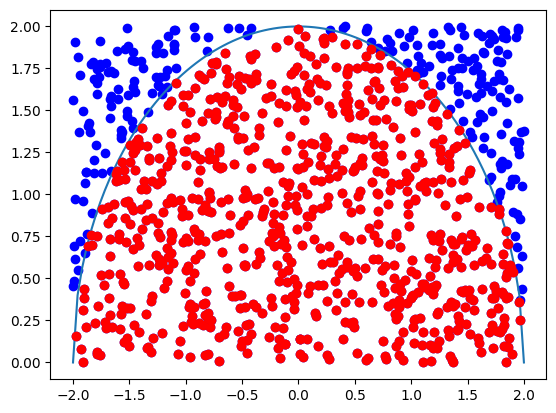

In [ ]:
# your monte carlo function here
xrandom = np.random.uniform(low = -2, high = 2, size = 1000)
yrandom = np.random.uniform(low = 0, high = 2, size = 1000)
plt.figure()
plt.plot(xrandom,yrandom,'bo')
x= np.linspace(-2,2,100)
f_x = np.sqrt(4 - (x**2))
plt.plot(x,f_x)
good = 0
N = 1000
keepflag = yrandom < np.sqrt(4 - (xrandom**2))

Ngood = np.sum(keepflag)
Area = Ngood/N

plt.plot(xrandom[keepflag],yrandom[keepflag],'ro')
print(Area)

### Running Your Monte Carlo Integration Function

* Use your function for integrating the area under the curve in Part 1.
* Set ```visualize=True``` to see make sure your function is behaving as expected.

0.786


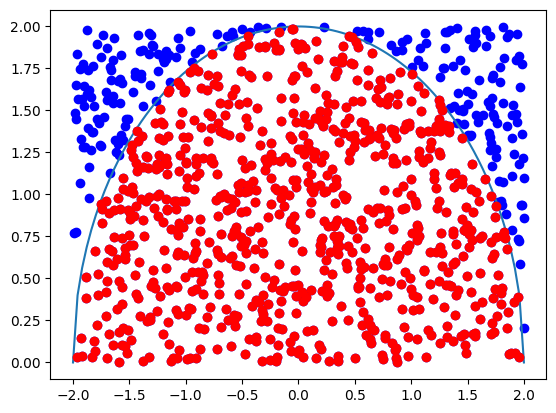

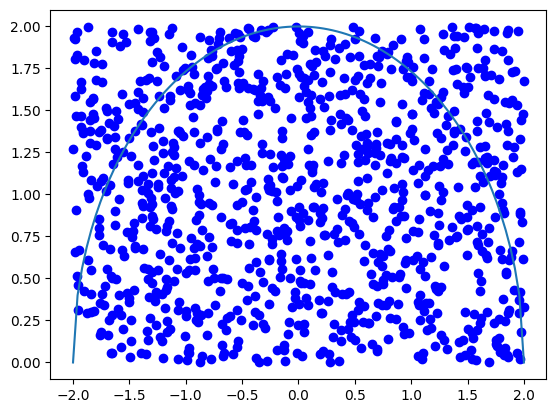

In [ ]:
# your code to calculate the area of a half circle using monte carlo
def mcintegrate(N, visualize=True):
    xrandom = np.random.uniform(low=-2, high=2, size=1000)
    yrandom = np.random.uniform(low=0, high=2, size=1000)
    plt.figure()
    plt.plot(xrandom, yrandom, 'bo')
    x = np.linspace(-2, 2, 100)
    f_x = np.sqrt(4 - (x**2))
    plt.plot(x, f_x)
    good = 0
    N = 1000
    keepflag = yrandom < np.sqrt(4 - (xrandom**2))
    Ngood = np.sum(keepflag)
    Area = Ngood / N
    if visualize:
        plt.plot(xrandom[keepflag], yrandom[keepflag], 'ro')
    else:
        print(Area)

mcintegrate(1000, visualize=True)
mcintegrate(1000, visualize=False)